# Tensorflow model for Medical Insurance dataset

In [230]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [231]:
df = pd.read_csv(r"D:\tensorflow_labs\Labs\insurance_cost_prediction\dataset\medical_insurance.csv")

In [232]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [233]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]>

In [234]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [235]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [236]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [237]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [238]:
#Check how many null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [239]:
# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['region'])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False


In [240]:
#Converting categorical to numeric
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,1,16884.92400,False,False,False,True
1,18,male,33.770,1,0,1725.55230,False,False,True,False
2,28,male,33.000,3,0,4449.46200,False,False,True,False
3,33,male,22.705,0,0,21984.47061,False,True,False,False
4,32,male,28.880,0,0,3866.85520,False,True,False,False


In [241]:
#Converting categorical to numeric
df['sex'] = df['sex'].map({'male':1,'female':0})
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [242]:
#Convert to True/False to numeric
for region in ['region_northeast','region_northwest','region_southeast','region_southwest']:
    df[region] = df[region].astype(int)

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


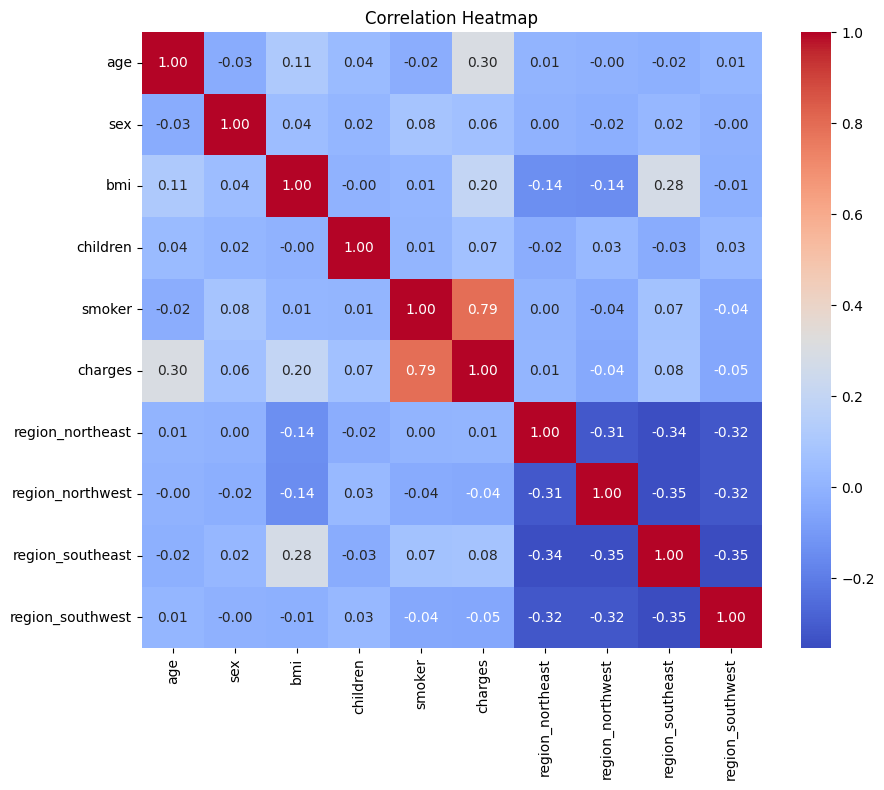

In [243]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [78]:
X=df.drop(columns=['charges'])
y=df['charges']

In [82]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Tensorflow Training

In [164]:
model_tf = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(1)
])

In [165]:
model_tf.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics='mae'
)

In [166]:
history= model_tf.fit(X_train,y_train,epochs=200,verbose=0)

<Axes: >

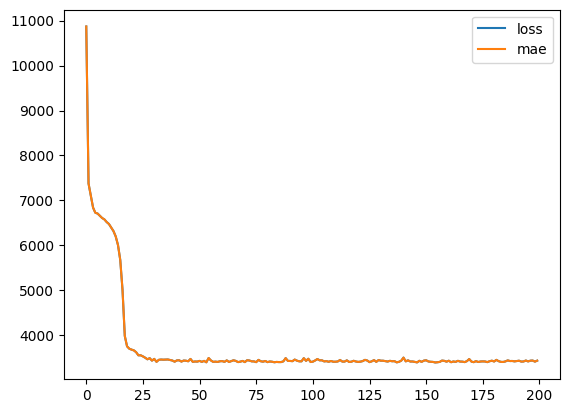

In [167]:
pd.DataFrame(history.history).plot()

In [168]:
model_tf.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 3472.3813 - mae: 3472.3813


[3472.38134765625, 3472.38134765625]

# Model is performing poorly, lets perform normalization on data

In [260]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'salary' column
df['bmi'] = scaler.fit_transform(df[['bmi']])
df['age'] = scaler.fit_transform(df[['age']])
df['children'] = scaler.fit_transform(df[['children']])
df['charges'] = scaler.fit_transform(df[['charges']])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0.251611,0,0,0,1
1,0.000000,1,0.479150,0.2,0,0.009636,0,0,1,0
2,0.217391,1,0.458434,0.6,0,0.053115,0,0,1,0
3,0.326087,1,0.181464,0.0,0,0.333010,0,1,0,0
4,0.304348,1,0.347592,0.0,0,0.043816,0,1,0,0


In [261]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2772.0,0.458906,0.306119,0.0,0.173913,0.456522,0.717391,1.0
sex,2772.0,0.507215,0.500038,0.0,0.000000,1.000000,1.000000,1.0
bmi,2772.0,0.396593,0.164903,0.0,0.276029,0.389763,0.506053,1.0
children,2772.0,0.220346,0.242961,0.0,0.000000,0.200000,0.400000,1.0
smoker,2772.0,0.203463,0.402647,0.0,0.000000,0.000000,0.000000,1.0
charges,2772.0,0.193771,0.193967,0.0,0.056919,0.131067,0.246708,1.0
region_northeast,2772.0,0.237374,0.425550,0.0,0.000000,0.000000,0.000000,1.0
region_northwest,2772.0,0.239538,0.426879,0.0,0.000000,0.000000,0.000000,1.0
region_southeast,2772.0,0.276335,0.447265,0.0,0.000000,0.000000,1.000000,1.0
region_southwest,2772.0,0.246753,0.431200,0.0,0.000000,0.000000,0.000000,1.0


In [262]:
X=df.drop(columns=['charges'])
y=df['charges']

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [263]:
model_tf = tf.keras.Sequential([
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

In [272]:
model_tf.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics='mae'
)

In [273]:
history = model_tf.fit(X_train,y_train,epochs=100,verbose=0)

<Axes: >

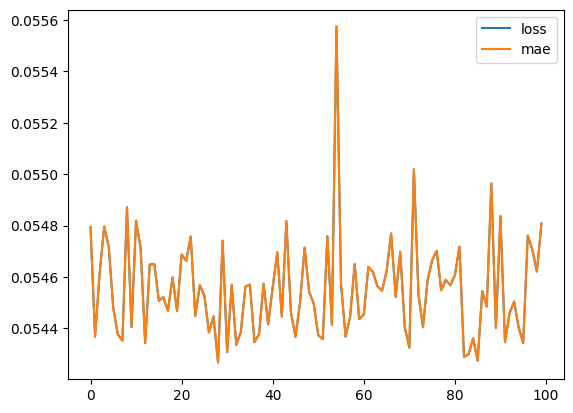

In [274]:
pd.DataFrame(history.history).plot()

In [275]:
model_tf.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 0.0540 - mae: 0.0540


[0.0540006123483181, 0.0540006123483181]

In [276]:
prediucted_values=model_tf.predict(X_test)

18/18 [==============================] - 0s 3ms/step


In [294]:
y_test.shape,prediucted_values.shape

((555,), (555, 1))

In [299]:
index=243
y_test.values.flatten()[index],prediucted_values.flatten()[index]

(0.23884435662676465, 0.21857418)

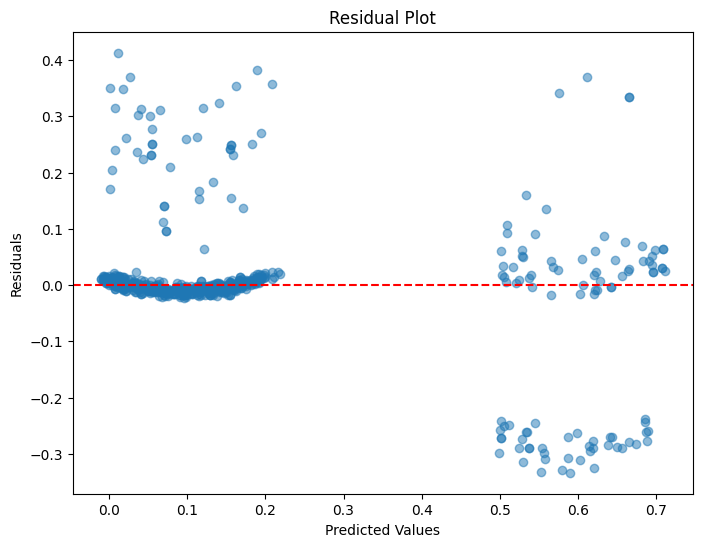

In [300]:
# Calculate residuals
y_true = y_test.values.flatten() # To convert dataframe with single col to ndarray 
residuals = y_true - prediucted_values.flatten() # To expand the ndarray [[],[]] to []

# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(prediucted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()